# Overview
Materials pulled from a [Python Visualization Workshop](https://github.com/stefmolin/python-data-viz-workshop)

Common visualization packages in Python
- Matplotlib: Static visualization package
- Seaborn: Static visualization package that enhances matplotlib
- Bokeh: Interactive graphics
- Plotly: Interactive graphic

## Famous Visuals

* [Gapminder](https://www.youtube.com/watch?v=jbkSRLYSojo)
* [Napolean's March](https://datavizblog.com/2013/05/26/dataviz-history-charles-minards-flow-map-of-napoleons-russian-campaign-of-1812-part-5/)
* [Cholera Outbreak in New York](https://www.visualcapitalist.com/wp-content/uploads/2018/04/data-viz-cholera.html)

## Python Visualization Landscape

In [1]:
import pandas as pd

In [ ]:
import numpy as np
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches



# Dataset
x = np.array([1,2,  5, 8, 10])
y = np.array([10,10, 8, 5, 1])

X_Y_Spline = make_interp_spline(x, y)

# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 50)
Y_ = X_Y_Spline(X_)

# Plotting the Graph
plt.plot(X_, Y_, linewidth=6, c="#AA9868")
plt.title("Rough Estimates of Trade Offs for Select Visualization Tools")
plt.xlabel("Fabricated Ease of Creation Index\n(10 is Easiest)")
plt.ylabel("Fabricated Customizability Index\n(10 is most customizable)")

#-- plt
x = 8; y=3
plt.scatter(x, y, c="#FFC72C")
plt.text(x, y-.5, "Matplotlib", ha="center")

#-- sns
x = 7.2; y=3.7
plt.scatter(x, y, c="#FFC72C")
plt.text(x, y-.5, "Seaborn", ha="center")

#-- ggplot2
x = 9; y=2.2
plt.scatter(x, y, c="#FFC72C")
plt.text(x, y-.5, "ggplot2", ha="center")

#-- Rshiny
x = 7.2; y=5.5
plt.scatter(x, y, c="#0190DB")
plt.text(x, y-.5, "RShiny", ha="center")
#-- Bokeh
x = 6.5; y=6
plt.scatter(x, y, c="#0190DB")
plt.text(x, y-.5, "Bokeh", ha="center")
#-- Plotly
x = 6; y=5.4
plt.scatter(x, y, c="#0190DB")
plt.text(x, y-.5, "Plotly", ha="center")
#-- d3.js
x = 1; y=9.6
plt.scatter(x, y, c="#0190DB")
plt.text(x, y-.5, "d3.js", ha="center")

blue = mpatches.Patch(color='#0190DB', label='Interactive')
gold = mpatches.Patch(color='#FFC72C', label='Static')
plt.legend(handles=[blue, gold])

sns.despine(right=True, top=True)
plt.show()

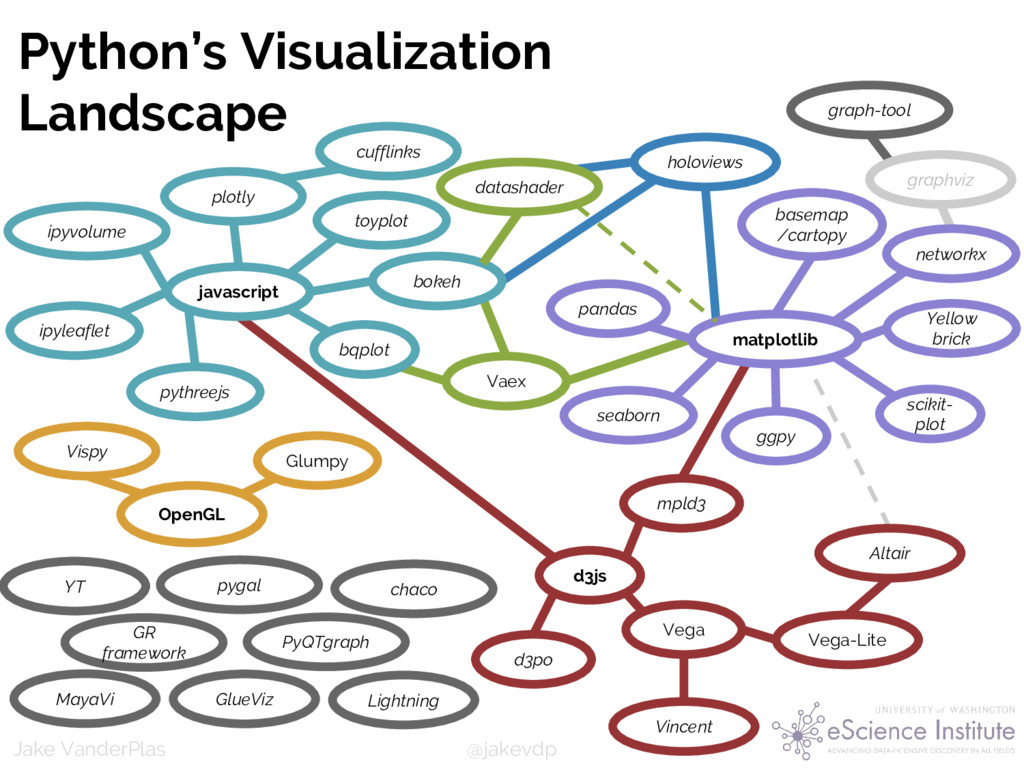

# Section 1: Getting Started With Matplotlib

We will begin by familiarizing ourselves with Matplotlib. Moving beyond the default options, we will explore how to customize various aspects of our visualizations. By the end of this section, you will be able to generate plots using the Matplotlib API directly, as well as customize the plots that libraries like pandas and Seaborn create for you.

## Why start with Matplotlib?

There are many libraries for creating data visualizations in Python (even more if you include those that build on top of them). In this section, we will learn about Matplotlib's role in the Python data visualization ecosystem before diving into the library itself.

<figure>
  <blockquote cite="https://matplotlib.org/stable/index.html" style="border-left: none; box-shadow: none;">
    Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. &#91;It&#93; makes easy things easy and hard things possible.
  </blockquote>
  <figcaption style="text-align: right">&ndash; <a href="https://matplotlib.org/stable/index.html" target="_blank" rel="noopener noreferrer">Matplotlib documentation</a></figcaption>
</figure>

We will start by working with the `stackoverflow.zip` dataset, which contains the title and tags for all Stack Overflow questions tagged with a select few Python libraries since Stack Overflow's inception (Sept. 2008) through Sept. 12, 2021. The data comes from the [Stack Overflow API](https://api.stackexchange.com/docs/search) – more information can be found in [this](../data/collection/stackoverflow.ipynb) notebook. Here, we are aggregating the data monthly to get the total number of questions per library per month:

In [3]:
stack_overflow = pd.read_csv(
    './Class_Data/stackoverflow.zip', parse_dates=True, index_col='creation_date'
)
stack_overflow.head(3)

,tags,title,pandas,matplotlib,numpy,seaborn,geopandas,geoviews,altair,yellowbrick,vega,holoviews,hvplot,bokeh
creation_date,,,,,,,,,,,,,,
2008-09-08 15:19:59,"['python', 'matlab', 'numpy', 'numerical', 'sc...",Open source alternative to MATLAB&#39;s fminco...,False,False,True,False,False,False,False,False,False,False,False,False
2008-09-21 20:23:02,"['python', 'numpy']",python.array versus numpy.array,False,False,True,False,False,False,False,False,False,False,False,False
2008-09-22 12:36:53,"['python', 'animation', 'matplotlib', 'image-s...",What is the fastest way to scale and display a...,False,True,False,False,False,False,False,False,False,False,False,False


In [8]:
stackoverflow_monthly = stack_overflow.loc[:'2021-08','pandas':'bokeh'].resample('1M').sum()
stackoverflow_monthly.head()

/tmp/ipykernel_193301/2135916524.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stackoverflow_monthly = stack_overflow.loc[:'2021-08','pandas':'bokeh'].resample('1M').sum()


,pandas,matplotlib,numpy,seaborn,geopandas,geoviews,altair,yellowbrick,vega,holoviews,hvplot,bokeh
creation_date,,,,,,,,,,,,
2008-09-30,0,2,3,0,0,0,0,0,0,0,0,0
2008-10-31,0,0,2,0,0,0,0,0,0,0,0,0
2008-11-30,0,0,3,0,0,0,0,0,0,0,0,0
2008-12-31,0,2,4,0,0,0,0,0,0,0,0,0
2009-01-31,0,1,7,0,0,0,0,0,0,0,0,0


*Source: [Stack Exchange Network](https://api.stackexchange.com/docs/search)*

Next, we plot monthly Matplotlib questions over time by calling the `plot()` method:

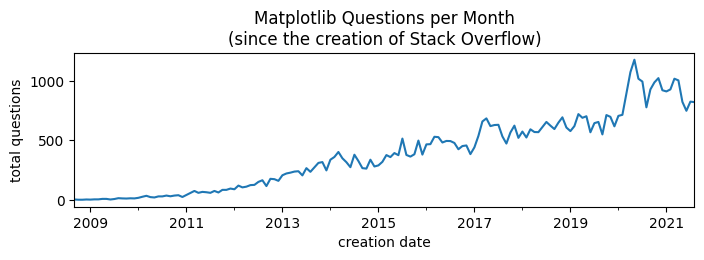

In [9]:
stackoverflow_monthly['matplotlib'].plot(
    figsize=(8, 2),
    xlabel='creation date', ylabel='total questions',
    title='Matplotlib Questions per Month\n(since the creation of Stack Overflow)'
)
plt.show()

Notice that this returns a Matplotlib `Axes` object since pandas is using Matplotlib as a plotting backend. This means that pandas takes care of a lot of the legwork for us &ndash; some examples include the following:

- Creating the figure: [source code](https://github.com/pandas-dev/pandas/blob/f5c224215ad0b3728173c67330ffcf13b35bdb2e/pandas/plotting/_matplotlib/core.py#L373-L392)
- Calling the `Axes.plot()` method: [source code](https://github.com/pandas-dev/pandas/blob/f5c224215ad0b3728173c67330ffcf13b35bdb2e/pandas/plotting/_matplotlib/core.py#L759-L760)
- Adding titles/labels: [source code](https://github.com/pandas-dev/pandas/blob/f5c224215ad0b3728173c67330ffcf13b35bdb2e/pandas/plotting/_matplotlib/core.py#L576-L591)

While pandas can do a lot of the work for us, there are benefits to understanding how to work with Matplotlib directly.

#### Flexibility

We can use other data structures (such as NumPy arrays) without the overhead of converting to a pandas data structure just to plot.

#### Customization

Even if we use pandas to make the initial plot, we can use Matplotlib commands on the `Axes` object that is returned to tweak other parts of the visualization. This is also the case for any library that uses Matplotlib as its plotting backend &ndash; examples of which include the following:
- [Cartopy](https://scitools.org.uk/cartopy/docs/latest/): geospatial data processing to produce map visualizations
- [ggplot](https://github.com/yhat/ggplot): Python version of the popular `ggplot2` R package
- [HoloViews](http://holoviews.org/): interactive visualizations with minimal code
- [Seaborn](https://seaborn.pydata.org/): high-level interface for creating statistical visualizations with Matplotlib
- [Yellowbrick](https://www.scikit-yb.org/): extension of Scikit-Learn for creating visualizations to analyze machine learning performance

*Note: Matplotlib maintains a list of such libraries [here](https://matplotlib.org/stable/thirdpartypackages/index.html).

#### Extensibility

You can also build on top of Matplotlib for personal/work libraries. This might mean defining custom plot themes or functionality to create commonly-used visualizations.

An example is the addition of the `refline()` method in the Seaborn library. This method makes it possible to draw horizontal/vertical reference lines on all subplots at once. The Matplotlib methods `axhline()` and `axvline()` are the basis of [this contribution](https://github.com/mwaskom/seaborn/commit/a626c0ae29b8c777b8e1342948e1611b984bf27b):

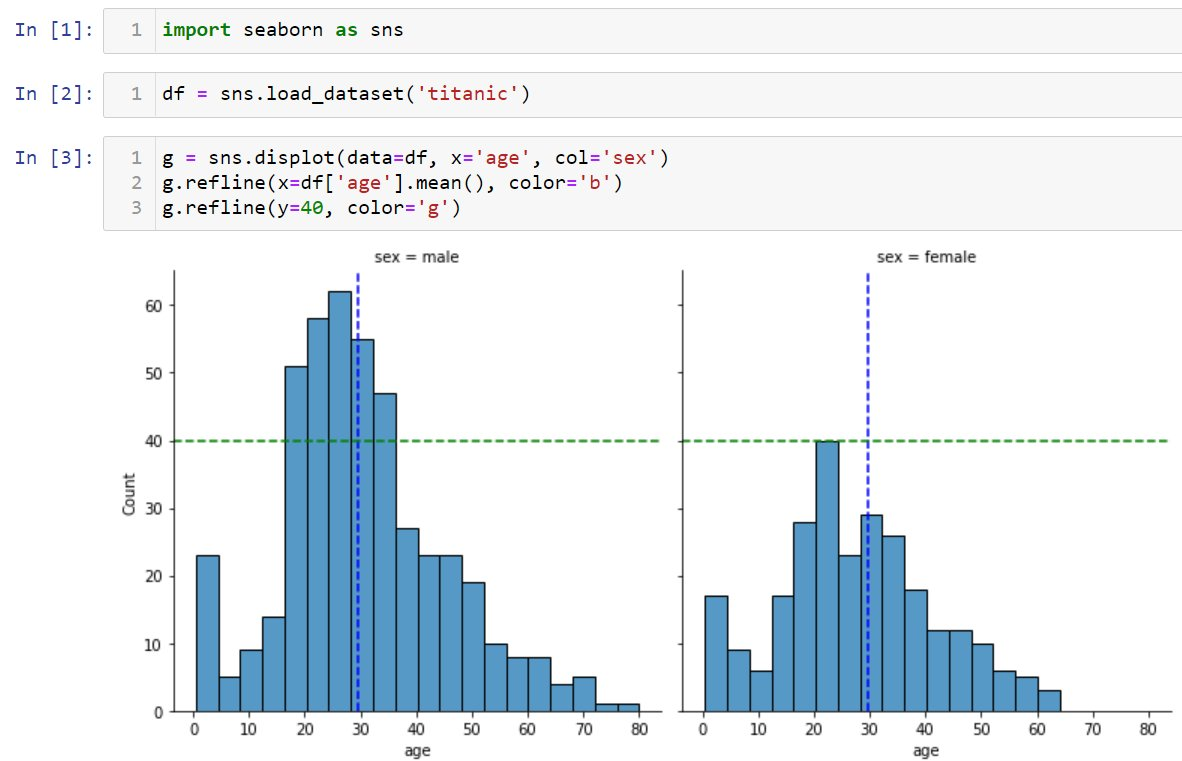

<div style="text-align: center;">
    <div><small><em><a href="https://twitter.com/chris1610/status/1446976863365124098">Source</a></em></small></div>
</div>

## Matplotlib basics

In this workshop, we will explore the static and animated visualization functionality to gain a breadth of knowledge of the library. While we won't go too in depth, additional resources will be provided throughout. Now, let's get started with the basics.

The `Figure` object is the container for all components of our visualization. It contains one or more `Axes` objects, which can be thought of as the (sub)plots, as well as other [*Artists*](https://matplotlib.org/stable/tutorials/intermediate/artists.html), which draw on the plot canvas (x-axis, y-axis, legend, lines, etc.). The following image from the Matplotlib documentation illustrates the different components of a figure:

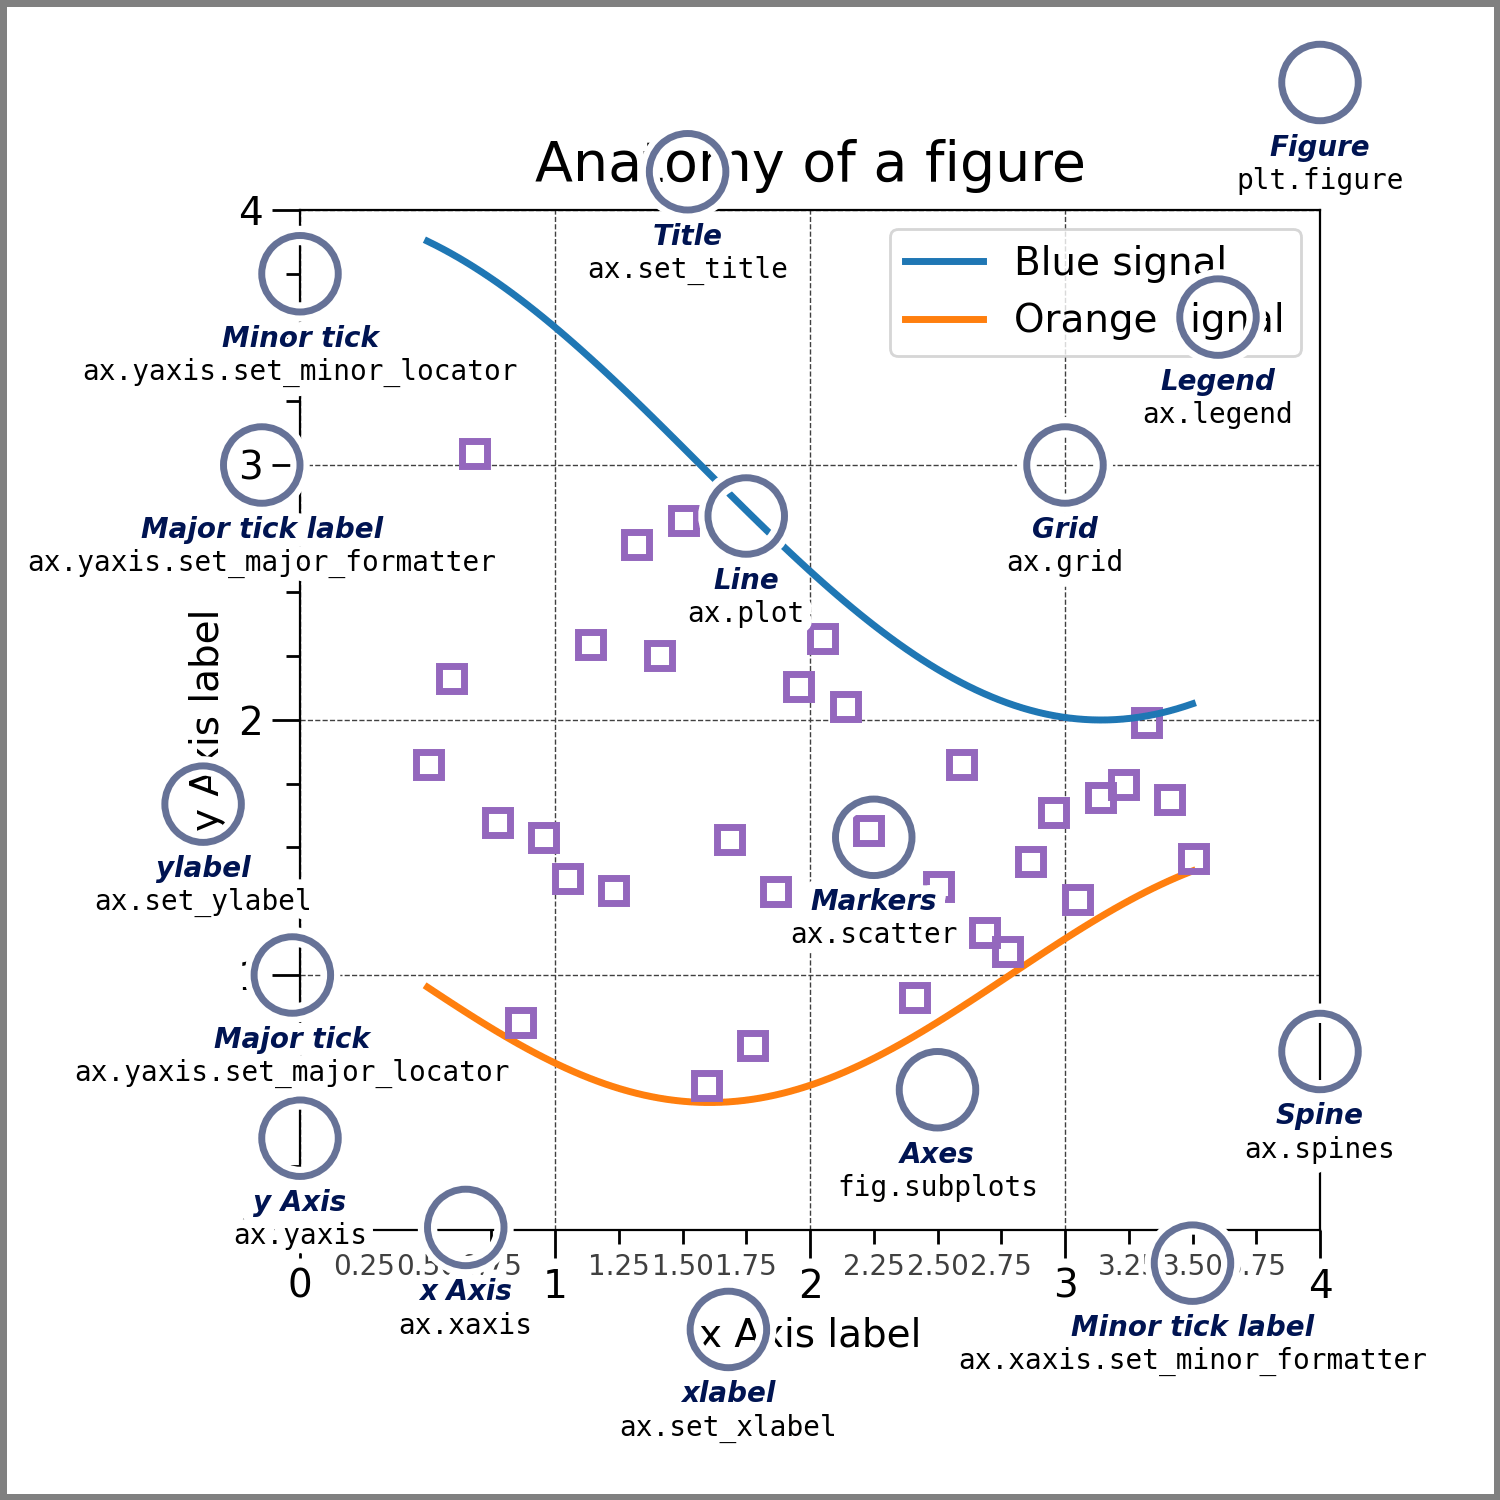

<div style="text-align: center;">
    <div><small><em><a href="https://matplotlib.org/stable/tutorials/introductory/quick_start.html#parts-of-a-figure">Source</a></em></small></div>
</div>

Matplotlib provides two main [plotting interfaces](https://matplotlib.org/stable/users/explain/api_interfaces.html):
1. **Functional (implicit)**: call <u>functions</u> provided by the `pyplot` module
2. **Object-oriented (explicit)**: call <u>methods</u> on `Figure` and `Axes` <u>objects</u>

While the object-oriented approach is encouraged by Matplotlib and highly recommended for non-interactive use (i.e., outside of a Jupyter Notebook), either approach is valid &ndash; you should, however, try to avoid mixing them. Note that different use cases lend themselves to different approaches, so we will explore examples of both in this section.

Regardless of the plotting interface we choose, we must import the `pyplot` module:

In [10]:
import matplotlib.pyplot as plt

#### Functional (implicit) approach

Text(0.5, 1.0, 'Matplotlib Questions per Month\n(since the creation of Stack Overflow)')

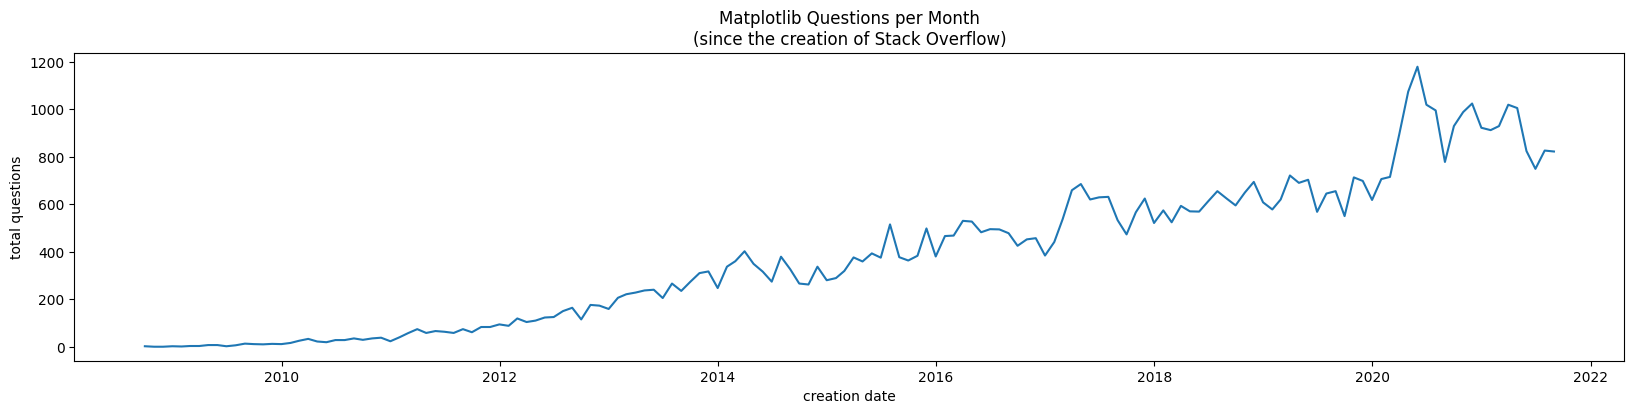

In [30]:
# figsize is determined by rcParams for plt.plot()
plt.plot(stackoverflow_monthly.index, stackoverflow_monthly.matplotlib)

plt.xlabel('creation date')
plt.ylabel('total questions')
plt.title('Matplotlib Questions per Month\n(since the creation of Stack Overflow)')

*Note: Since we are working in a Jupyter Notebook, we don't need to do anything to display our plot here. If we weren't, we would need to call `plt.show()` to do so.*

#### Object-oriented (explicit) approach

Text(0.5, 1.0, 'Matplotlib Questions per Month\n(since the creation of Stack Overflow)')

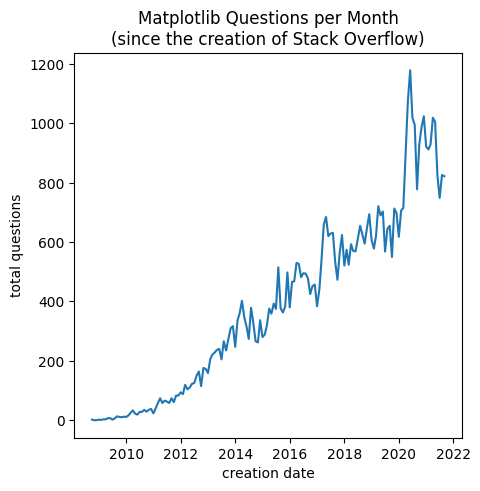

In [22]:
# creates the Figure and adds a single Axes object
fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(stackoverflow_monthly.index, stackoverflow_monthly.matplotlib)

ax.set_xlabel('creation date')
ax.set_ylabel('total questions')
ax.set_title('Matplotlib Questions per Month\n(since the creation of Stack Overflow)')

*Tip: Take note that each of the plotting commands is returning something. These are Matplotlib objects that we can use to further customize the visualization as well.*

As mentioned before, we can use Matplotlib code to modify the plot that pandas created for us. Here, we will use the object-oriented approach to remove the top and right spines and to start the y-axis at 0, while keeping the current setting for the end:

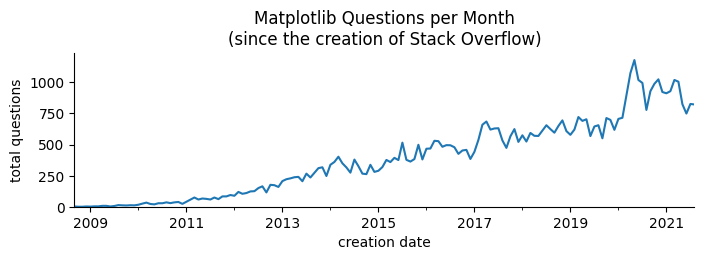

In [41]:
ax = stackoverflow_monthly['matplotlib'].plot(
    figsize=(8, 2), xlabel='creation date', ylabel='total questions',
    title='Matplotlib Questions per Month\n(since the creation of Stack Overflow)'
)
ax.set_ylim(0, None) # this can also be done with pandas

# hide some of the spines (must be done with Matplotlib)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

*Tip: You can use the functional approach to change the y-axis limits by replacing `ax.set_ylim(0, None)` with `plt.ylim(0, None)`.*

Now that we have the basics down, let's see how to create other plot types and add additional components to them, like legends, reference lines, and annotations. Note that the anatomy of a figure diagram we looked at earlier will help moving from idea to implementation since it helps identify the right keywords to search. It may also be helpful to bookmark [this](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf) Matplotlib cheat sheet.

## Plotting with Matplotlib

Now that we understand a little bit of how Matplotlib works, we will walk through some more involved examples, which include legends, reference lines, and/or annotations, building them up step by step. Note that while using a library like pandas to do the initial plot creation can makes things easier, we will focus on using Matplotlib exclusively to get more familiar with it.

Each example in this section will showcase both how to build a specific plot with Matplotlib directly and how to customize it with some of the more advanced plotting techniques available. In particular, we will learn how to build and customize the following plot types:
- line plots
- scatter plots
- area plots
- bar plots
- stacked bar plots
- histograms
- box plots

### Line plot

The Stack Overflow data we have been working with thus far is a time series, so the first set of visualizations will be for studying the evolution of the data over time. However, rather than using a monthly aggregate like before, we will use daily data, so we will read in the data once more and this time aggregate it daily:

In [66]:
stackoverflow_daily = pd.read_csv(
    './Class_Data/stackoverflow.zip', parse_dates=True, index_col='creation_date'
).loc[:,'pandas':'bokeh'].resample('1D').sum()
stackoverflow_daily.tail(3)

,pandas,matplotlib,numpy,seaborn,geopandas,geoviews,altair,yellowbrick,vega,holoviews,hvplot,bokeh
creation_date,,,,,,,,,,,,
2021-09-10,132,19,44,7,4,0,0,0,2,0,0,2
2021-09-11,66,19,17,2,1,0,0,0,0,0,0,1
2021-09-12,69,14,24,3,0,1,0,0,0,0,0,0


We are going to visualize how the rolling 30-day mean number of Matplotlib questions changed over time, along with the standard deviation. To do so, we first need to calculate these data points using pandas:

In [67]:
avgs = stackoverflow_daily.rolling('30D').mean()
stds = stackoverflow_daily.rolling('30D').std()

avgs.tail()

,pandas,matplotlib,numpy,seaborn,geopandas,geoviews,altair,yellowbrick,vega,holoviews,hvplot,bokeh
creation_date,,,,,,,,,,,,
2021-09-08,136.933333,26.966667,37.133333,5.766667,1.833333,0.000000,0.500000,0.133333,0.500000,0.400000,0.033333,1.033333
2021-09-09,138.000000,27.033333,37.933333,5.766667,1.833333,0.000000,0.533333,0.133333,0.566667,0.400000,0.000000,1.033333
2021-09-10,137.100000,26.733333,37.966667,5.800000,1.833333,0.000000,0.533333,0.133333,0.566667,0.366667,0.000000,1.066667
2021-09-11,133.433333,26.400000,37.233333,5.666667,1.833333,0.000000,0.533333,0.133333,0.533333,0.333333,0.000000,1.000000
2021-09-12,130.466667,25.933333,36.666667,5.666667,1.733333,0.033333,0.533333,0.133333,0.533333,0.233333,0.000000,0.866667


Now, we can proceed to building this visualization. We will work through the following steps over the next few slides:
1. Create the line plot.
2. Add a shaded region for $\pm$2 standard deviations from the mean.
3. Set the axis labels, y-axis limits, plot title, and despine the plot.

#### 1. Create the line plot.

By default, the `plot()` method will return a line plot:

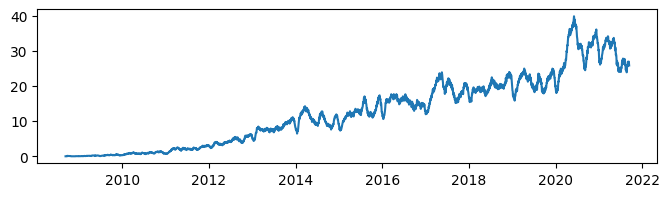

In [68]:
fig, ax = plt.subplots(figsize=(8, 2))
ax.plot(avgs.index, avgs.matplotlib)
plt.show()

#### 2. Add a shaded region for $\pm$2 standard deviations from the mean.

Next, we use the `fill_between()` method to shade the region $\pm$2 standard deviations from the mean. Note that we also set `alpha=0.25` to make the region 25% opaque &ndash; transparent enough to easily see the line for the rolling 30-day mean:

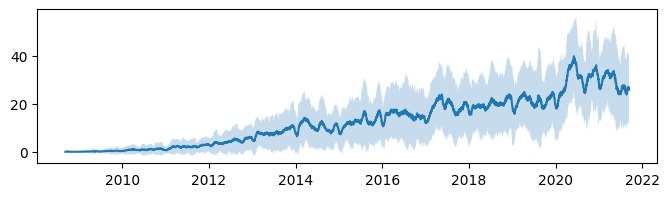

In [69]:
fig, ax = plt.subplots(figsize=(8, 2))
ax.plot(avgs.index, avgs.matplotlib)
ax.fill_between(
    avgs.index, avgs.matplotlib - 2 * stds.matplotlib,
    avgs.matplotlib + 2 * stds.matplotlib, alpha=0.25
)
plt.show()

#### 3. Set the axis labels, y-axis limits, plot title, and despine the plot.

Now for the final touches. While in previous examples we used `ax.set_xlabel()`, `ax.set_ylabel()`, etc., here we use `ax.set()`, which allows us to set multiple attributes of the plot in a single method call.

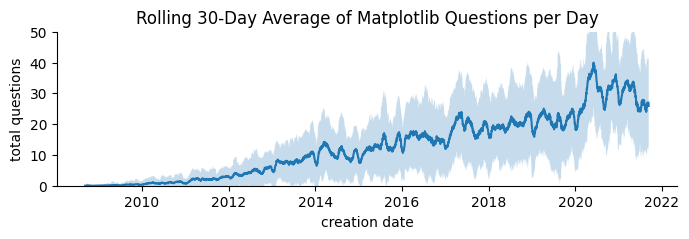

In [139]:
fig, ax = plt.subplots(figsize=(8, 2))
ax.plot(avgs.index, avgs.matplotlib)
ax.fill_between(
    avgs.index, 
    avgs.matplotlib - 2 * stds.matplotlib,
    avgs.matplotlib + 2 * stds.matplotlib, 
    alpha=0.25
)

ax.set(
    xlabel='creation date', ylabel='total questions', ylim=(0, 50),
    title='Rolling 30-Day Average of Matplotlib Questions per Day'
)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

*Note: Since we are working in a Jupyter Notebook, our figures are automatically closed after we run the cell. However, if you are working elsewhere, make sure to call `plt.close()` to free up those resources when you are finished.*

### Scatter plot

The `plot()` method can also be used to create scatter plots, but we have to pass in some additional information. Let's build up to a scatter plot of monthly Matplotlib questions with some "best fit" lines:

1. Create the scatter plot.
2. Convert to Matplotlib dates.
3. Add the best fit lines.
4. Label the axes, add a legend, and despine.
5. Format both the x- and y-axis tick labels.

#### 1. Create the scatter plot.

So far, we have passed x and y as positional arguments to the `plot()` method; however, there is a third argument we haven't explored: the format string (`fmt`) is a shorthand for specifying the marker (shape of the point), line style, and color to use for the plot. We can use this to create a scatter plot with the `plot()` method.

Note that while there is some flexibility in the order these are specified, it is recommended that we specify them in the following order:

```python
fmt = '[marker][line][color]'
```

Here, we use the format string `ok` to create a scatter plot with black (`k`) circles (`o`); notice that we don't specify a line style because we don't want lines this time:

In [72]:
stackoverflow_monthly.head()

,pandas,matplotlib,numpy,seaborn,geopandas,geoviews,altair,yellowbrick,vega,holoviews,hvplot,bokeh
creation_date,,,,,,,,,,,,
2008-09-30,0,2,3,0,0,0,0,0,0,0,0,0
2008-10-31,0,0,2,0,0,0,0,0,0,0,0,0
2008-11-30,0,0,3,0,0,0,0,0,0,0,0,0
2008-12-31,0,2,4,0,0,0,0,0,0,0,0,0
2009-01-31,0,1,7,0,0,0,0,0,0,0,0,0


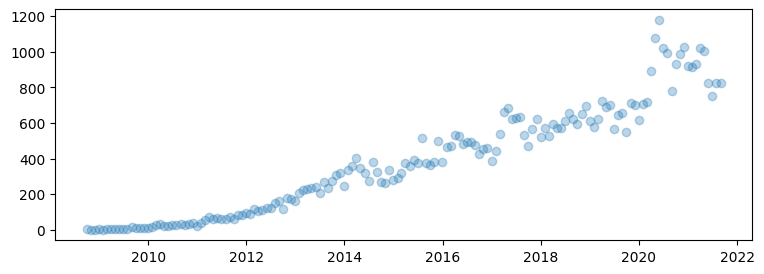

In [111]:
fig, ax = plt.subplots(figsize=(9, 3))
ax.plot(
    stackoverflow_monthly.index,
    stackoverflow_monthly.matplotlib,
    'o', label=None, alpha=0.3
)

*Tip: As an alternative, the `scatter()` method can be used to create a scatter plot, in which case we don't need to specify the format string (`fmt`).*

By changing the `third argument` in the ax.plot() function, we change the type od `marker`. [Here is](https://matplotlib.org/stable/api/markers_api.html) a list of available markers.

### Area plot

We have just been using the Matplotlib questions time series, but it's also interesting to look at trends for multiple libraries. Since the libraries in this dataset vary in age, popularity, and number of Stack Overflow questions, a good option to view many at once is an area plot. This will give us an idea of both the overall trend for these types of libraries and the libraries themselves. Let's start by subsetting our daily Stack Overflow questions data to the top four libraries by number of questions:

In [138]:
# Get the columns with the largest numbers of questions (sum the columns and then filter)
subset = stackoverflow_daily.sum().nlargest(4)
# get rid of columns that are not those most-queried tools
top_libraries_monthly = stackoverflow_monthly.filter(items=subset.index)
# display
top_libraries_monthly.head()

,pandas,numpy,matplotlib,seaborn
creation_date,,,,
2008-09-30,0,3,2,0
2008-10-31,0,2,0,0
2008-11-30,0,3,0,0
2008-12-31,0,4,2,0
2009-01-31,0,7,1,0


Now, we can build up our plot. Once again, we will break this down in steps:
1. Create the area plot.
2. Label and format the axes, provide a title, and despine the plot.
3. Add annotations.

#### 1. Create the area plot.

As with many things in Python, there are a million different ways to get the same result, we just want to strive to choose the simplest path that allows us maximum flexibility. Sometimes it is easiest to combine the object-oriented approach while using the Pandas/Matplotlib functions.

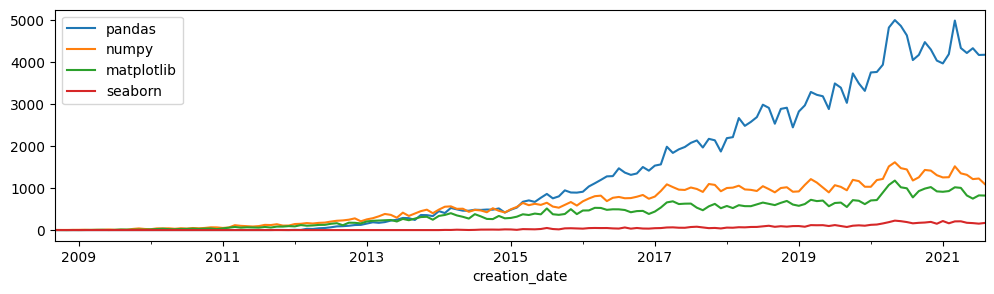

In [19]:
fig, ax = plt.subplots(figsize=(12, 3)) #-- Object-oriented approach
top_libraries_monthly.plot(ax=ax) #-- Pandas plotting, but pass in axis obbject to link them!
plt.show()
# alternative one-liner: top_libraries_monthly.plot(figsize=(12,3))

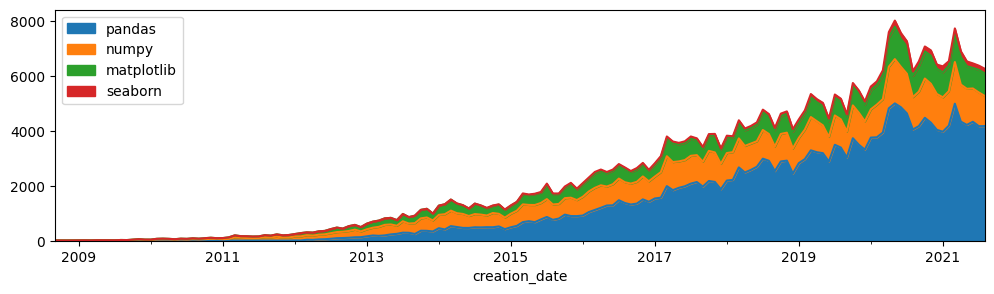

In [21]:
fig, ax = plt.subplots(figsize=(12, 3))
top_libraries_monthly.plot(ax=ax, kind="area")
plt.show()
# alternative one-liner: top_libraries_monthly.plot(figsize=(12,3), kind='area')

#### 1. Create the bar plot.
We can use the horizontal bar -- `barh()` -- method to create horizontal bars. (Nix the 'h' -- `bar()` -- for the vertical bar method.)

In [147]:
stackoverflow_daily.head(3)

,pandas,matplotlib,numpy,seaborn,geopandas,geoviews,altair,yellowbrick,vega,holoviews,hvplot,bokeh
creation_date,,,,,,,,,,,,
2008-09-08,0,0,1,0,0,0,0,0,0,0,0,0
2008-09-09,0,0,0,0,0,0,0,0,0,0,0,0
2008-09-10,0,0,0,0,0,0,0,0,0,0,0,0


In [155]:
# get total queries by library into a new dataframe
per_lib = stackoverflow_daily.sum().reset_index()
# rename the columns
per_lib = per_lib.rename(columns={"index":"Library", 0:"Number_of_Questions"})
# display
per_lib.head()

,Library,Number_of_Questions
0,pandas,214919
1,matplotlib,60554
2,numpy,93797
3,seaborn,7414
4,geopandas,1652


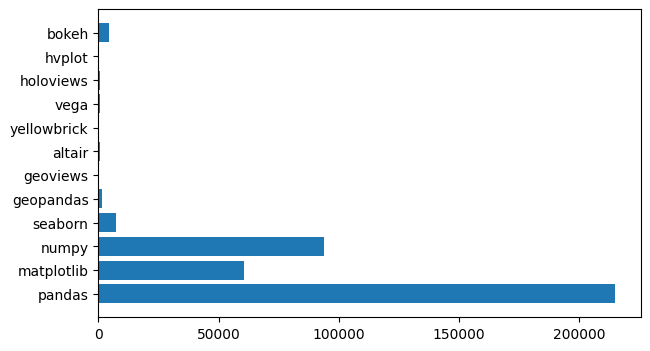

In [156]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.barh(per_lib["Library"], per_lib["Number_of_Questions"])
plt.show()

hmmmm, maybe we should re-order this?

Now, we can actually see all the bars:

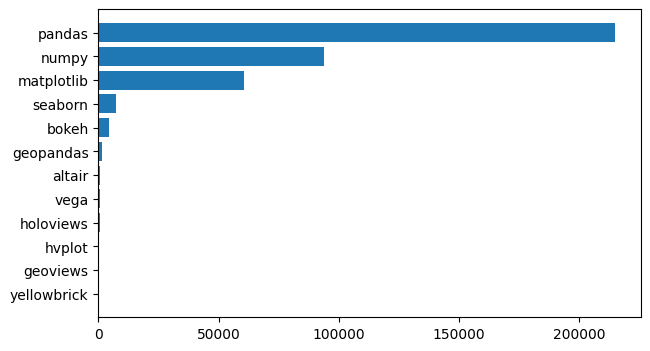

In [159]:
#-- re-order
per_lib = per_lib.sort_values("Number_of_Questions")

#-- Back to the plot
fig, ax = plt.subplots(figsize=(7, 4))
ax.barh(per_lib["Library"], per_lib["Number_of_Questions"])
plt.show()

[Text(0.5, 0, 'total questions'), None]

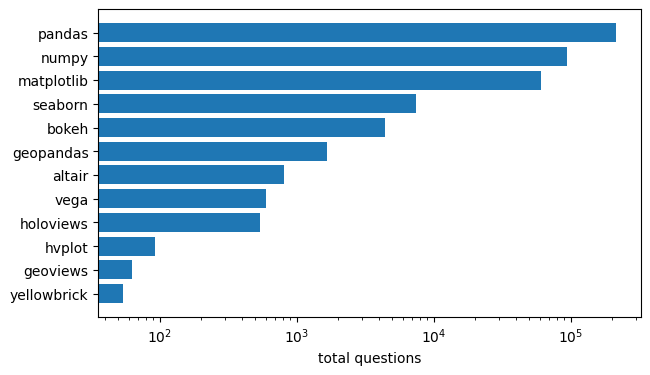

In [161]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.barh(per_lib["Library"], per_lib["Number_of_Questions"])
ax.set(xlabel='total questions', xscale='log')

### Stacked bar plot


In [174]:
top_libraries_monthly.head()

,pandas,numpy,matplotlib,seaborn
creation_date,,,,
2008-09-30,0,3,2,0
2008-10-31,0,2,0,0
2008-11-30,0,3,0,0
2008-12-31,0,4,2,0
2009-01-31,0,7,1,0


In [175]:
top_libraries_annual = top_libraries_monthly.resample('Y').sum()
top_libraries_annual.head()

/tmp/ipykernel_193301/2511338909.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  top_libraries_annual = top_libraries_monthly.resample('Y').sum()


,pandas,numpy,matplotlib,seaborn
creation_date,,,,
2008-12-31,0,12,4,0
2009-12-31,0,160,86,0
2010-12-31,0,524,331,0
2011-12-31,12,1201,811,3
2012-12-31,753,2357,1606,0


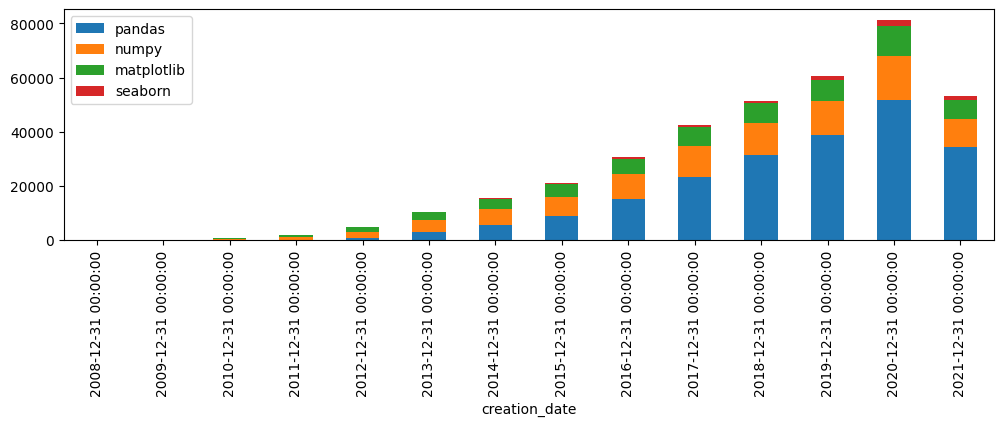

In [176]:
fig, ax = plt.subplots(figsize=(12, 3))
top_libraries_annual.plot(ax=ax, kind="bar", stacked=True)
plt.show()

### Swarmplot in seaborn

The seaborn package is built on top of matplotlib and provides visually striking and engaging plots that can be easy to execute if your data is well structured. See a gallery of seaborn plots [here](https://seaborn.pydata.org/examples/index.html). 

In [190]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [191]:
iris = pd.melt(iris, id_vars='species')
iris.head()

,species,variable,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


<Axes: xlabel='variable', ylabel='value'>

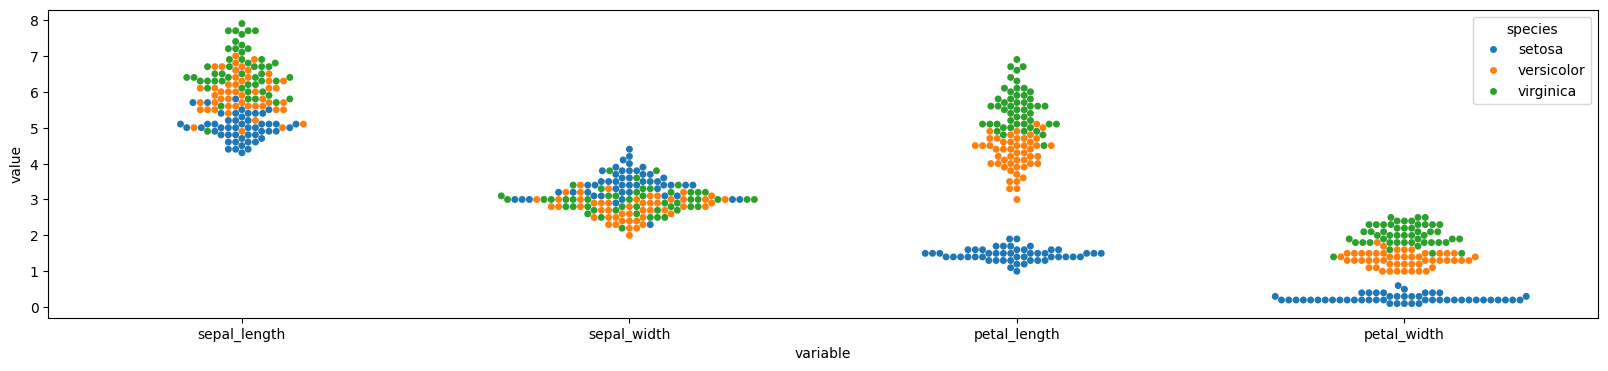

In [192]:
sns.swarmplot(data=iris, x='variable', y='value', hue='species')

### Additional resources

We've covered a lot of Matplotlib, but there is still more to learn. Here are some additional resources on what we covered:

- Legend guide [tutorial](https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html)
- `matplotlib.dates` [API summary](https://matplotlib.org/stable/api/dates_api.html)
- `matplotlib.pyplot` [API summary](https://matplotlib.org/stable/api/pyplot_summary.html)
- `matplotlib.ticker` [API summary](https://matplotlib.org/stable/api/ticker_api.html)
- More on annotations [here](https://matplotlib.org/stable/tutorials/text/annotations.html) and [here](https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html)
- Text properties and layout [tutorial](https://matplotlib.org/stable/tutorials/text/text_props.html)
- Plot configuration with [style sheets and rcParams](https://matplotlib.org/stable/tutorials/introductory/customizing.html)

The following are some additional avenues for exploration:

- Autoscaling [tutorial](https://matplotlib.org/stable/tutorials/intermediate/autoscale.html)
- Creating custom plot layouts:
    - [with GridSpec](https://matplotlib.org/stable/tutorials/intermediate/gridspec.html)
    - [with subfigures](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subfigures.html)
    - [with subplot_mosaic()](https://matplotlib.org/stable/tutorials/provisional/mosaic.html)
- Easily varying colors, line styles, etc. with [cycler](https://matplotlib.org/stable/tutorials/intermediate/color_cycle.html)
- Matplotlib toolkits:
    - [3D plots with mplot3d](https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html#sphx-glr-tutorials-toolkits-mplot3d-py)
    - [plot layouts with axes_grid1](https://matplotlib.org/stable/tutorials/toolkits/axes_grid.html)
- Working with images [demo](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_demo.html)